In [5]:
import json
from datetime import date

import matplotlib as mpl
import requests

today = date.today()

mpl.rcParams["figure.dpi"] = 150

start = "2020-01-01"
until = today.strftime("%Y-%m-%d")
author = "niradler55"

res = requests.get(
    f"https://npm-stat.com/api/download-counts?author={author}&from={start}&until={until}"
)

print(author,start,until,res.status_code)

if res.status_code != 200:
    raise Exception(res.text)
    
data = json.loads(res.text)

niradler55 2020-01-01 2020-09-05 200


In [17]:
import csv

csv_data = []

for pkg in data:
    for key in data[pkg]:
        if key:
            csv_data.append({"date": key, "name": pkg, "downloads": data[pkg][key]})


with open("C:/Users/nir/notebooks/npm_stats.csv", mode="w") as csv_file:
    fields = ["date", "name", "downloads"]
    writer = csv.DictWriter(csv_file, fieldnames=fields)
    writer.writeheader()
    for row in csv_data:
        writer.writerow(row)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-17-b1d49e19e292>, line 11)

In [27]:
count = 0

for pkg in data:
    for key in data[pkg]:
        count += data[pkg][key]

print(f"{count} Downloads.")

19332 Downloads.


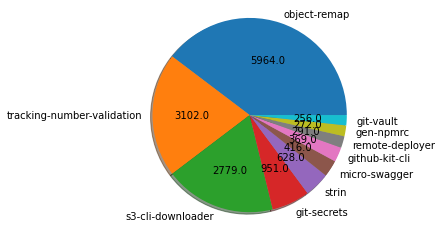

In [33]:
import matplotlib.pyplot as plt
import numpy

top10 = []

for pkg in data:
    count = 0
    for key in data[pkg]:
        count += data[pkg][key]

    top10.append({"name": pkg, "count": count})

top10.sort(key=lambda x: x["count"], reverse=True)
top10 = top10[:10]

keys = []
values = []
for i in top10:
    keys.append(i["name"])
    values.append(i["count"])


values = numpy.array(values)


def absolute_value(val):
    a = numpy.round(val / 100.0 * values.sum(), 0)
    return a


fig1, ax1 = plt.subplots()
ax1.pie(values, labels=keys, autopct=absolute_value, shadow=True)
ax1.axis("equal")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

stats = []

for pkg in data:
    x = []
    y = []
    count = 0
    for key in data[pkg]:
        year, month, day = key.split("-")
        year = int(year)
        month = int(month)
        day = int(day)
        x.append(datetime.datetime(year, month, day))
        y.append(data[pkg][key])
        count += data[pkg][key]
    stats.append({"name": pkg, "count": count, "x": x, "y": y})

stats.sort(key=lambda x: x["count"], reverse=True)

top20 = stats[:20]
for i in top20:
    print(i["name"] + ":")
    x = np.array(i["x"])
    y = np.array(i["y"])
    plt.plot(x, y)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

pkg = input()
res = requests.get(
    f"https://npm-stat.com/api/download-counts?package={pkg}&from={start}&until={until}"
)

if res.status_code != 200:
    raise Exception(res.text)

pkg_data = json.loads(res.text)

y = []
x = []
count = 0

for key in pkg_data[pkg]:
    year, month, day = key.split("-")
    year = int(year)
    month = int(month)
    day = int(day)
    x.append(datetime.datetime(year, month, day))
    y.append(pkg_data[pkg][key])
    count += pkg_data[pkg][key]

print(count,"Downalods.")
plt.plot(x, y)
plt.show()

In [21]:
import pandas

df = pandas.read_csv("C:/Users/nir/notebooks/npm_stats.csv")
df.head()

,date,name,downloads
0,2020-01-01,appless,0
1,2020-01-02,appless,0
2,2020-01-03,appless,0
3,2020-01-04,appless,0
4,2020-01-05,appless,1


In [22]:
df.describe()

,downloads
count,13832.000000
mean,1.397629
std,6.569699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,234.000000


In [23]:
df.columns.values

array(['date', 'name', 'downloads'], dtype=object)

In [26]:
df[df["downloads"] > 0].sum()

date         2020-01-052020-01-062020-01-142020-01-212020-0...
name         applessapplessapplessapplessapplessapplessappl...
downloads                                                19332
dtype: object

In [28]:
df[df["downloads"] > 0].groupby(["name"]).sum()

,downloads
name,
@niradler55/schedulerjs,82
@niradler55/timejs,64
apigateway-export-tool,207
appless,43
appless-lambda,52
autocmd,50
autocrun,49
autosnip,46
cmd-runner,58


In [32]:
df[df["downloads"] > 0].max()

date               2020-09-03
name         url-query-search
downloads                 234
dtype: object

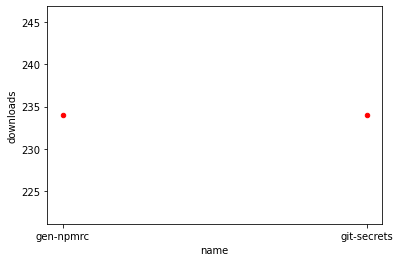

In [44]:
df[df["downloads"] > 150].plot(kind='scatter',x='name',y='downloads',color='red')
plt.show()

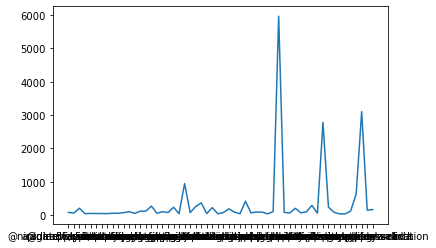

In [71]:
df[df["downloads"] > 0].groupby(["name"]).sum().values.tolist()
y = df[df["downloads"] > 0].groupby(["name"]).sum().to_numpy()
x = df[df["downloads"] > 0].groupby(["name"]).sum().index.to_numpy()
plt.plot(x, y)
plt.show()